# Projekt MSP1 / 2024
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 27. 10. 2024 v IS VUT. Kontrola bude probíhat na Pythonu 3.12.3 (standardní instalace Ubuntu); neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

_Ondřej Bahounek xbahou00_

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Výsledky jsou uložené ve formátu JSON - pro zpracování použijte knihovnu `json`.
Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou může být to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

Upravte také pomocí funkce `.astype()` datové typy patřičných sloupců.

```py
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        with zf.open(filename, "r") as f:
            pass # vytvořte slovník

df = pd.DataFrame(data)
df
```

In [3]:
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        if not filename.endswith("json"):
            continue
        with zf.open(filename, "r") as f:
            content = f.read()
            data.append(json.loads(content))

df = pd.DataFrame(data)
df['status'] = df['status'].astype("category")
df['configuration'] = df['configuration'].astype("category")
df

,configuration,run,runtime,status
0,config6,149,53.733556,SUCCESS
1,config2,16,134.543496,SUCCESS
2,config6,180,117.108040,SUCCESS
3,config4,12,223.763044,SUCCESS
4,config5,193,159.540473,SUCCESS
...,...,...,...,...
1195,config5,95,199.461297,SUCCESS
1196,config5,99,155.491930,SUCCESS
1197,config2,83,125.243690,SUCCESS
1198,config5,153,223.312938,SUCCESS


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. Vyberte vhodný graf, který zobrazí samostatně jednotlivé konfigurace.


Objevují se nulové hodnoty času
Pro všechny je společný status:
['SEGFAULT']
Categories (3, object): ['SEGFAULT', 'SUCCESS', 'TIME LIMIT']

U každé configurace jsou běhy, které nedoběhly a ukončil je timelimit = 1800.0
Pro všechny je společný status:
['TIME LIMIT']
Categories (3, object): ['SEGFAULT', 'SUCCESS', 'TIME LIMIT']


c:\Users\Bahno\Desktop\skola\7sem\MSP\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bahno\Desktop\skola\7sem\MSP\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bahno\Desktop\skola\7sem\MSP\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bahno\Desktop\skola\7sem\MSP\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Bahno\Desktop\skola\7

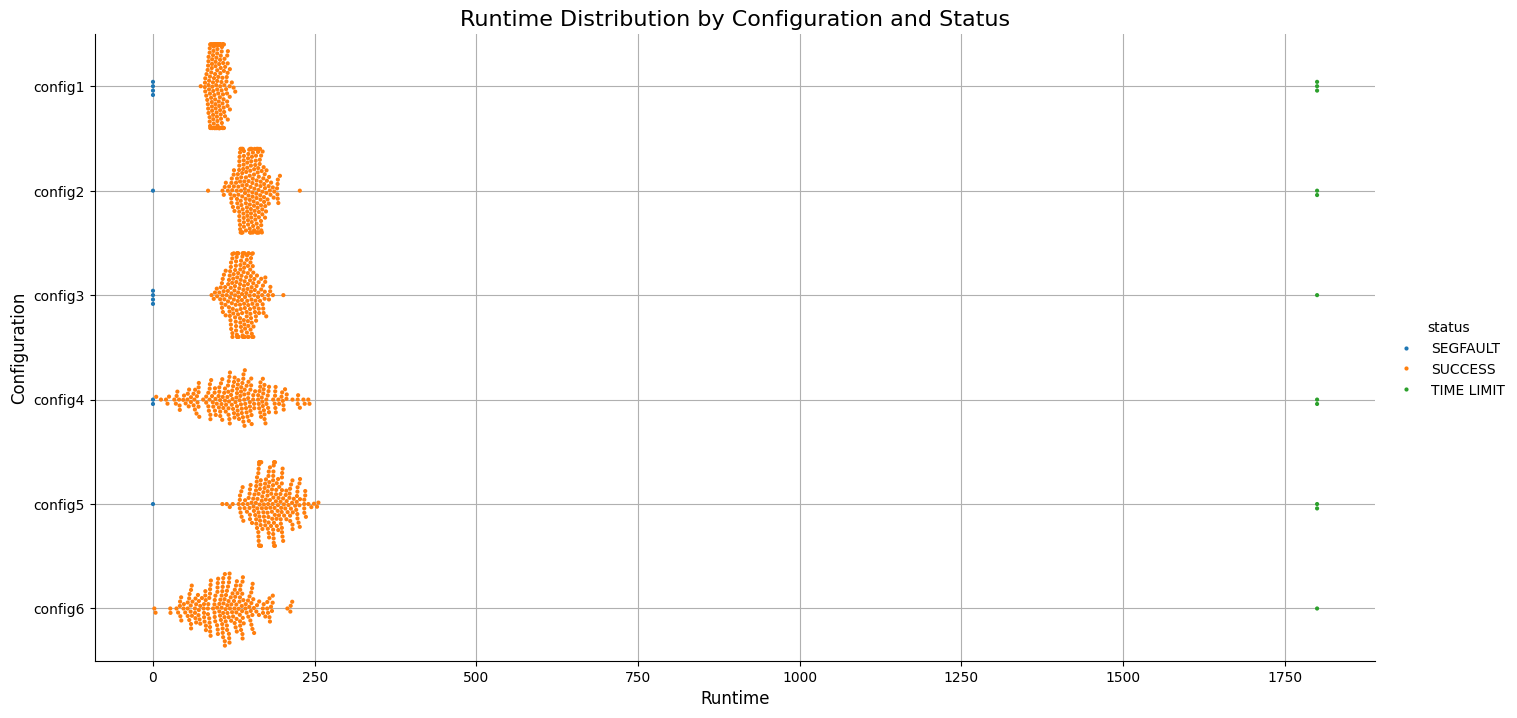

In [4]:


print("")
print("Objevují se nulové hodnoty času")
zero_time = df[df['runtime'] == 0]
print("Pro všechny je společný status:")
print(zero_time['status'].unique())

print("")
print(f"U každé configurace jsou běhy, které nedoběhly a ukončil je timelimit = {df['runtime'].max()}")
print("Pro všechny je společný status:")
print(df[df['runtime']==df['runtime'].max()]['status'].unique())


sns.catplot(
    x='runtime', 
    y='configuration', 
    hue='status',
    data=df,
    aspect=2,
    height=7,
    kind='swarm',
    s= 9,
)
plt.title('Runtime Distribution by Configuration and Status', fontsize=16)
plt.xlabel('Runtime',fontsize=12)
plt.ylabel('Configuration',fontsize=12)
plt.grid(True)

__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů? Proč jste zvolili tento typ grafu?_

Objevily se chybné hodnoty. Objevily se hodnoty runtime = 0, které doprovázel status SEGFAULT. Značí tedy nejspíš, že algoritmus nečekaně selhal v průbehu běhu, nebo jeho běh ani nezačal. 

Taky se objevily běhy s časem 1800 a statusem TIME OUT. Běhy algoritmů se nejspíše zacyklily a ukončil je až TIMEOUT.

Zvolil jsem bodový category graph typu swarn (jednotlivé body se nepřekrívají), protože umožnňuje reprezentovat všechny 3 podstatné informace (configuraci, status, runtime) v jednom grafu. Zvládne ukázat samostatně každý bod měření, takže jsou vyditelná i chybná data. Zárověn je dobře viditelný poměr chybných a správných dat.


Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

Odstraníme běhy, které nezačali nebo neskončily
Počet zbylých chybných hodnot: 0


<Figure size 1200x800 with 0 Axes>

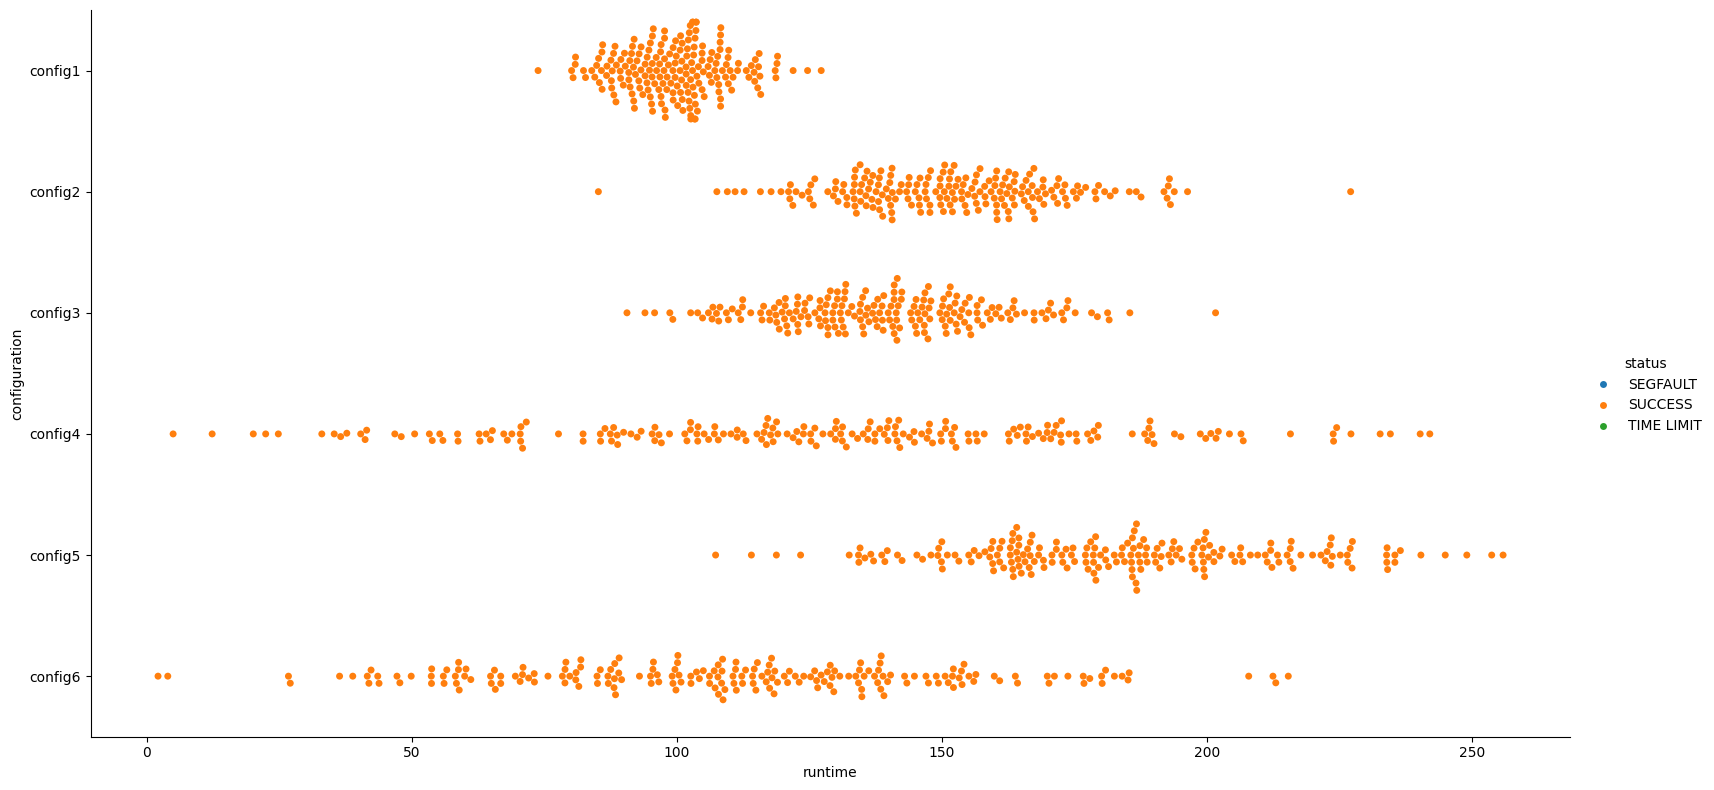

In [5]:
print("Odstraníme běhy, které nezačali nebo neskončily")
clean_df = df[df['status'] == 'SUCCESS']

print(f"Počet zbylých chybných hodnot: {len(clean_df[clean_df['runtime']==0]) + len(clean_df[clean_df['runtime']==1800])}")


plt.figure(figsize=(12, 8))

sns.catplot(
    x='runtime', 
    y='configuration', 
    hue='status',    # This will color code based on status
    data=clean_df,         # Your DataFrame
    aspect=2,
    height=8,
    kind='swarm'
)


## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [6]:
summary_stats = clean_df.groupby('configuration',observed=False)['runtime'].describe()
print("Statistiky každé konfigurace:")
summary_stats

Statistiky každé konfigurace:


,count,mean,std,min,25%,50%,75%,max
configuration,,,,,,,,
config1,193.0,99.590413,9.386788,73.802549,92.979469,99.865028,104.824724,127.201692
config2,197.0,151.732975,19.833198,85.174653,137.995662,151.516091,163.802880,227.054630
config3,195.0,138.616959,19.867428,90.567110,124.803901,138.678404,151.536291,201.577616
config4,196.0,127.606156,50.282164,4.970286,94.793688,129.975246,164.327163,241.987620
config5,197.0,183.659767,28.729836,107.283620,164.070091,183.843132,201.250693,255.807973
config6,199.0,110.422689,40.875754,2.124534,81.656211,111.043642,137.554141,215.295283


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

Všechny kofigurace měly se segfaultem nebo timeoutem.<br/>
Nejemnší střední hodnotu běhu má první konfigurace, průměrně je tedy nejrychlejší. Taktéž má nejmenší směrodatnou odchylku. Takže jeho středné výsledky jsou nejgarantovanější z configurací. Na druhou ze všech konfigurací nejvíckrát skončil segfaultem nebo timeoutem.<br/>
Konfigurace 5 má nejvyší střední hodnutu délky běhu.<br/>
Minimální hodnoty běhu dosáhla konfigurace 6.<br/>
Konfigurace 4 má největší standarrtní odchylku, dosahuje díky tomu aji velmi nízkým aji velmi vysokých dob běhu.


## Vizualizace
Vizualizujte časy běhů algoritmů tak, aby byl v jednom grafu zřejmý i rozptyl hodnot, avšak bylo možné porovnání. Zvolte vhodný graf, který pak níže komentujte.

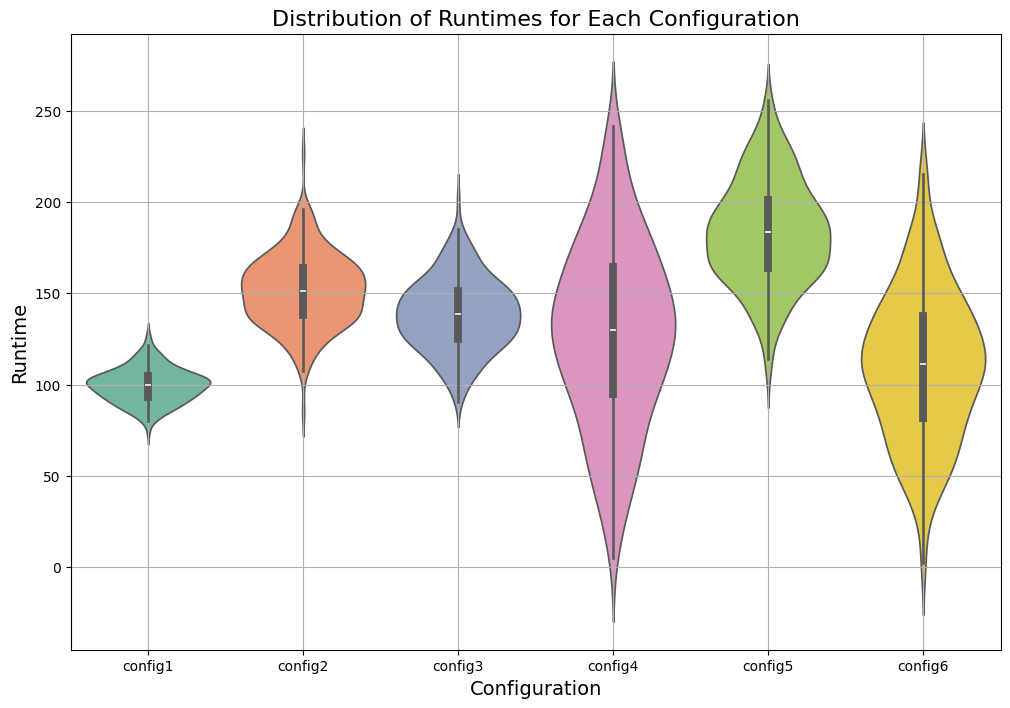

In [7]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=clean_df,x='configuration',y='runtime',hue='configuration',palette='Set2',inner='box')

plt.title('Distribution of Runtimes for Each Configuration', fontsize=16)
plt.xlabel('Configuration', fontsize=14)
plt.ylabel('Runtime', fontsize=14)
plt.grid(True)

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

Je vidět všechny střední hodnoty se pohybují mezi hodnotou 100 a 200.<br/>
Konfigurace 6 má jenom o trochu vyšší střední hodnotu než konfigurace 1, ale má dalke větší rozptyl. Dosahuje tedy daleko lepších i horších výsledků než konfigurace 1.<br/>
Rozptyl u čtvrté a šesrté konfigurace je značně veětší, než u zbytku konfigurací.

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. 

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet vybraného rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

Budu zkoumat konfiguraci 1 a 6, protože mají nejnižší střední hodnoty.<br/>
Konfigurace 1 má o něco nižší střední hodnotu, konfigurace 6 má ale daleko větší variaci.<br/>
Chtěl bycj použít `Independent samples t-test`, test předpokládá normalní rozložení hodnot a stejnou variaci obou konfigurací. Bohužel kvůli velkému rozdílu variance nemohu test použít, použiji proto `Welchův t-test` neboli `unequal variances t-test`, který nepředpokládá stejné variance obou populací. Pomocí testu zjistíme jestli se střední hodnoty obou konfigurací významě liší. <br/>
Nultá hypotéza je: `Střední hodnoty obou rozložení se rovnají.`<br/>
Alternativní hypotéza: `Střední hodnota obou rozložení je různá.`

In [8]:
# TODO: Implementace s využitím knihovní funkcí

config1 = clean_df[clean_df['configuration'] == 'config1']['runtime'].to_numpy()
config6 = clean_df[clean_df['configuration'] == 'config6']['runtime'].to_numpy()

# test pro jestli data mají normální distribuci a mohu tedy použít t-test
# použiji Shapiro-Wilk test
from scipy.stats import shapiro
stat1, p1 = shapiro(config1)
stat2, p2 = shapiro(config6)
# Nultá hypotéza Shsapiro-Wilk testu zni: "Hodnoty x1,x2,...,xn přišli z normalně rozložené distribuce."
print(f"Config 1: Shapiro-Will test p-hodnota: {p1}")
print(f"Config 6: Shapiro-Will test p-hodnota: {p2}")
# Protože p-hodnoty jsou vysoké (daleko vyšší než 0.05), nemohu zamítnout nultou hypotézu. Tzn. data pochazí z normálních distribucí. 


# Welchův test
from scipy.stats import ttest_ind

# Perform Welch's t-test
t_stat, p_value = ttest_ind(config1, config6, equal_var=False)

print(f"Welch's t-test: t-statistka = {t_stat}, p-hodnota = {p_value}")

Config 1: Shapiro-Will test p-hodnota: 0.8348061354960176
Config 6: Shapiro-Will test p-hodnota: 0.7656591016111406
Welch's t-test: t-statistka = -3.64068343471875, p-hodnota = 0.0003391848275884963


__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

P-hodnota je 0.00034, což je o dost menší než typická hladina významnosti 0.05, která se používá k vyhodnocování testu. Protože je p-hodnota menší než 0.05, tak zamítám nultou hypotézu, že střední hodnoty jsou stejné. A přijímám alternativní hypotézu, že jsou rozdílné<br/>
Která konfigurace je rychlejší ?<br/>
Protože statistika-t je záporná, znamená to, že střední hodnota konfigurace 1 je menší než střední hodnota konfigurace 6. (Konfigurace 1 má taktéž menší střední hodnotu spočítanou přímo z dat)<br/>
Tedy: `Konfigurace 1 je nejrychlejší konfigurace algoritmu.`

### Vlastní implementace
Implementujte stejný test pomocí knihovních funkcí a ukažte, že je výsledek stejný.

In [19]:
# TODO vlastni implementace zvoleneho testu

from scipy.stats import t
def welch_ttest(arr1,arr2):
    arr1_mean = arr1.mean()
    arr2_mean = arr2.mean()
    # ddof = 1, aby při výpočtu směrodatné odchylky bylo v čitately N-1 (stejně jako v scipy t-testu), np.std() má jinak v čitateli pouze N
    arr1_std = arr1.std(ddof=1)
    arr2_std = arr2.std(ddof=1)
    n1 = len(config1)
    n2 = len(config6)

    t_stat = (arr1_mean-arr2_mean)/(np.sqrt(  (arr1_std/np.sqrt(n1))**2 +  (arr2_std/np.sqrt(n2))**2))

    # spočítám degrees of freedom pomocí Welch–Satterthwaite rovnice
    # vzorec degrees of freedom stejně jako vzorec Welchového testu je přebrán z wikipedie: https://en.wikipedia.org/wiki/Welch%27s_t-test
    numerator = ( ((arr1_std**2)/n1) + ((arr2_std**2)/n2))**2
    denominator = ((arr1_std**4)/((n1**2)*(n1-1))) + ((arr2_std**4)/((n2**2)*(n2-1)))
    df = numerator / denominator

    # p-hodnotu spočítám pomocí komulativní distribuční funkce
    p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))

    return t_stat,p_value

np_t_stat,np_p_value = welch_ttest(config1,config6)
print(f"T-statistika: {np_t_stat}")
print(f"P-hondota: {np_p_value}")
print(f"T-statistika pomocí numpy se rovná t-statistice z scipy = {np.isclose(t_stat,np_t_stat)}")
print(f"P-hodnota pomocí numpy se rovná p-hondotě ze scipy = {np.isclose(p_value,np_p_value)}")



T-statistika: -3.6406834347187504
P-hondota: 0.0003391848275884346
T-statistika pomocí numpy se rovná t-statistice z scipy = True
P-hodnota pomocí numpy se rovná p-hondotě ze scipy = True
